# Stellar Flux
| Author  | Stanley A. Baronett & Shangjia Zhang |
|---------|--------------------------------------|
| Created |  10/04/2023          |
| Updated |  10/04/2023          |

\begin{align*}
  \frac{P(r, \theta)}{r} &= \frac{P_0}{r_0}\left(\frac{r}{r_0}\sin\theta\right)^{-1/2} \\
  \rho_\mathrm{mid}(r, \theta) &= \rho_0\left(\frac{r}{r_0}\sin\theta\right)^{-9/4}\exp\left(-\frac{r}{r_0 r_c}\sin\theta\right) \\
  \rho(r, \theta) &= \rho_\mathrm{mid}(r,\theta)\exp\left[\frac{GM_0}{P(r,\theta)}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
  \mathrm{d}\tau_* &= \kappa_*\rho(r, \theta)\mathrm{d}r \\
  \tau_*(\theta) &= \int_r \mathrm{d}\tau_* \\
  F_*(r, \theta) &= \left(\frac{R_*}{r}\right)^2\frac{1}{4}\mathbb{CP}T_*^4\left(1 - \exp\left[-\tau_*(\theta)\right]\right)
\end{align*}

/tmp/ipykernel_22443/3429263484.py:62: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x1f, x2v, np.log10(F_star))


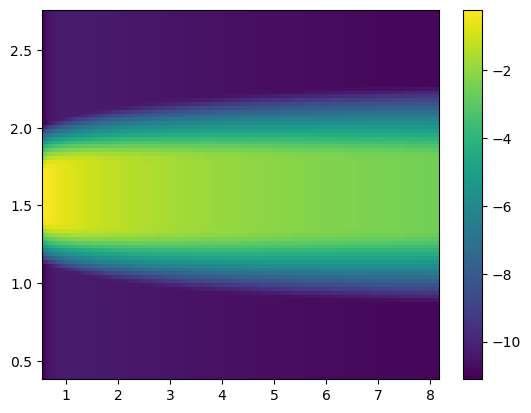

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def DenProfileSph(r, theta, phi):
  p_over_r = p0_over_r0*np.power(r*np.sin(theta)/r0, pslope);
  denmid = rho0*np.power(r*np.sin(theta)/r0, dslope)*np.exp(-r*np.sin(theta)/r0/r_c);
  dentem = denmid*np.exp(gm0/p_over_r*(1./r - 1./(r*np.sin(theta))));
  return dentem

# quantities and units
kappa_star_cgs    = 10
dfloor            = 1e-12
rho0              = 1        # [\rho_0]
p0_over_r0        = 4.80e-03
pslope            = -0.5
dslope            = -2.25
r0                = 1
r_c               = 2.5      # ?
gm0               = 1
dgratio           = 100      # dust-to-gas ratio?
small_grain_ratio = 0.02184
t_star            = 9.42e-1  # [T_0]
r_star            = 1.16e-4  # [L_0]
# the total stellar luminosity is 1 Lsun

# athinput.stellar_flux
# <mesh>
nx1          = 64                  # Number of zones in X1-direction
x1min        = 0.54                # minimum value of X1
x1max        = 8.0                 # maximum value of X1

nx2          = 96                  # Number of zones in X2-direction
x2min        = 0.3831043444619522  # minimum value of X2
x2max        = 2.758488309127841   # maximum value of X2

# <radiation>
prat         = 1.13e3              # $a_rT_0^4/P_0$
crat         = 6.36e4              # $c/v_0$
unit         = 1                   # adopt the units in the input file
T_unit       = 6.14e3              # T_0 [K]
density_unit = 4.28e-14            # \rho_0 [g/cm^3]
length_unit  = 5.98e14             # L_0 [cm]

# Get from .athdf snapshot
x1f = np.logspace(np.log10(x1min), np.log10(x1max), nx1+1, dtype=np.float64)
x1v = np.sqrt(x1f[:-1]*x1f[1:])
x2f = np.linspace(x2min, x2max, nx2+1, dtype=np.float64)
x2v = 0.5*(x2f[:-1]+x2f[1:])
X1V, X2V = np.meshgrid(x1v, x2v)

rho_extend = np.zeros((nx2, nx1+1), dtype=np.float64)
rho_extend[:, 0] = 0
rho_extend[:, 1:] = DenProfileSph(X1V, X2V, 0) # or read in from your code
rho_extend[rho_extend<dfloor] = dfloor

kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
dx1 = np.concatenate(([0], np.diff(x1f)))
dtau_star = kappa_star*dx1[None, :]*rho_extend
tau_star  = np.cumsum(dtau_star, axis=1)
F_star = (r_star/x1f)**2*(0.25*crat*prat)*t_star**4*(1-np.exp(-tau_star))

plt.pcolormesh(x1f, x2v, np.log10(F_star))
plt.colorbar()

/tmp/ipykernel_22443/906973358.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x1v, x2v, np.log10(divF_star))
/tmp/ipykernel_22443/906973358.py:3: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x1v, x2v, np.log10(divF_star))


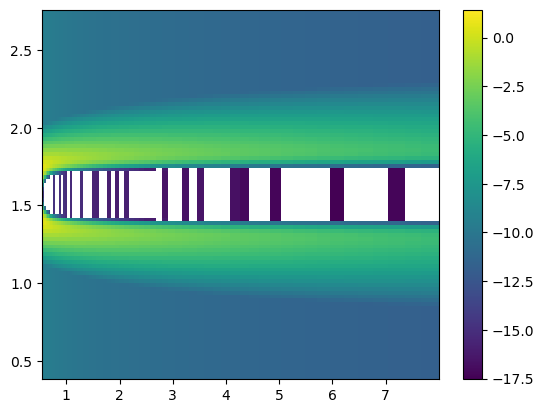

In [2]:
divF_star = np.diff(x1f[None, :]**2 * F_star, axis=1) / np.diff(x1f[None, :], axis=1) / (x1v[None, :]**2)

plt.pcolormesh(x1v, x2v, np.log10(divF_star))
plt.colorbar()